# Random forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

In [1]:
# Import the data
import pandas as pd

In [2]:
df = pd.read_csv("D:/Shiva Data Science/ExcelR Assignments/Decision Trees/Company_Data.csv", encoding='latin1')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
# Convert the 'Sales' variable into categorical by dividing into high and low sales
median_sales = df['Sales'].median()
df['Sales'] = ['High' if value > median_sales
                        else 'Low' for value in df['Sales']]
df['Sales']

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales, Length: 400, dtype: object

In [6]:
# Data transformation
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [7]:
Columns_to_encode = ["Sales","ShelveLoc","Urban","US"]
for columns in Columns_to_encode:
    df[columns] = LE.fit_transform(df[columns])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [8]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
# Split independent and dependent variables
X = df.iloc[:,1:11]
Y = df.iloc[:,0:1]

In [10]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [11]:
Y

,Sales
0,0
1,0
2,0
3,1
4,1
...,...
395,0
396,1
397,1
398,1


In [12]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [13]:
import numpy as np
np.unique(Y)

array([0, 1])

In [14]:
Y.value_counts()

Sales
1        201
0        199
dtype: int64

In [15]:
list(df)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [16]:
#EDA

df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,-0.035578,-0.123460,-0.251910,-0.069327,0.392275,-0.106962,0.186707,0.028847,0.047090,-0.142579
CompPrice,-0.035578,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,-0.123460,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,-0.251910,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,-0.069327,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,0.392275,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,-0.106962,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,0.186707,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,0.028847,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,0.047090,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


In [17]:
# Split the data to training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)


In [18]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((320, 10), (80, 10), (320, 1), (80, 1))

In [19]:
# Model fitting

from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)


In [20]:
DTC.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
# Predict the model
Y_pred_train = DTC.predict(X_train)
Y_pred_test = DTC.predict(X_test)


In [22]:
# Model evulation

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Accuracy score for Training data: ", ac1.round(3))
print("Accuracy score for Test data: ", ac2.round(3))

Accuracy score for Training data:  0.769
Accuracy score for Test data:  0.6


# RANDOM FOREST Model

In [23]:
# RANDOM FOREST Model
#------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=150,
                      max_samples=0.6,
                      max_features=0.7)
RFC.fit(X_train,Y_train)
Y_pred_train = RFC.predict(X_train)
Y_pred_test = RFC.predict(X_test)

# Model evulation

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Accuracy score for Training data: ", ac1.round(3))
print("Accuracy score for Test data: ", ac2.round(3))

C:\Users\91879\AppData\Local\Temp\ipykernel_5228\1481701643.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train,Y_train)


Accuracy score for Training data:  0.997
Accuracy score for Test data:  0.75


[Text(0.5, 0.875, 'x[4] <= 131.5\nentropy = 1.0\nsamples = 320\nvalue = [160, 160]'),
 Text(0.25, 0.625, 'x[5] <= 0.5\nentropy = 0.973\nsamples = 243\nvalue = [145, 98]'),
 Text(0.125, 0.375, 'x[4] <= 93.0\nentropy = 0.843\nsamples = 59\nvalue = [16, 43]'),
 Text(0.0625, 0.125, 'entropy = 0.937\nsamples = 17\nvalue = [11, 6]'),
 Text(0.1875, 0.125, 'entropy = 0.527\nsamples = 42\nvalue = [5, 37]'),
 Text(0.375, 0.375, 'x[5] <= 1.5\nentropy = 0.88\nsamples = 184\nvalue = [129, 55]'),
 Text(0.3125, 0.125, 'entropy = 0.222\nsamples = 56\nvalue = [54, 2]'),
 Text(0.4375, 0.125, 'entropy = 0.979\nsamples = 128\nvalue = [75, 53]'),
 Text(0.75, 0.625, 'x[0] <= 145.5\nentropy = 0.711\nsamples = 77\nvalue = [15, 62]'),
 Text(0.625, 0.375, 'x[2] <= 8.5\nentropy = 0.48\nsamples = 58\nvalue = [6, 52]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36]'),
 Text(0.6875, 0.125, 'entropy = 0.845\nsamples = 22\nvalue = [6, 16]'),
 Text(0.875, 0.375, 'x[4] <= 156.5\nentropy = 0.998\nsa

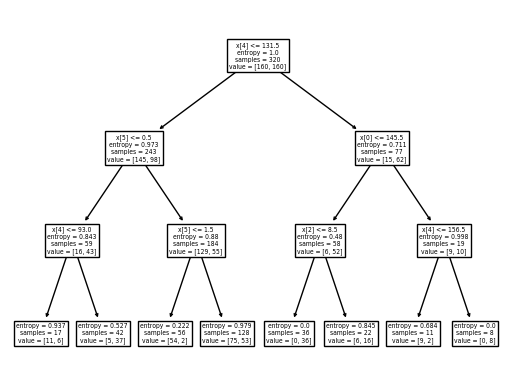

In [24]:
from sklearn import tree
tree.plot_tree(DTC)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

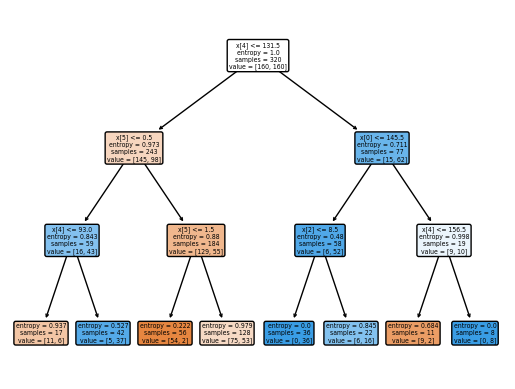

In [25]:
from sklearn import tree
import graphviz

Data = tree.plot_tree(DTC,filled=True,rounded= True)
Graph = graphviz.Source(Data)
Graph